# **1mg Medicine Dataset 2025 Web Scraping**

## **Analysis Pipeline**
* **Load the Analysis Stack**
* **Load data**
* **Quick data audit**
* **What percentage of medicines require a prescription vs. do not require a prescription?**
* **Identify columns with the highest missing values and list the top 5.**
* **Find the top 10 manufacturers with the highest number of medicines listed.**
* **What are the most common action classes?**
* **Which drugs have the highest discounts?**
* **Find the average MRP and average Selling Price of medicines (after cleaning).**
* **Which drugs are currently out of stock?**
* **What is the distribution of medicine prices?**
* **Top 10 Manufacturers**

## **Load the Analysis Stack**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## **Load data**

In [63]:
df = pd.read_csv("D:/PYTHON 2/ᗪᗩTᗩ/NOVEMBER/1mg Medicine Dataset 2025 Web Scraping/onemg.csv")
print("✅ Loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Loaded successfully!
Shape: (780, 35)


,Drug_Name,Drug_URL,Drug_Type,Prescription_Required,MRP,Discount_Percentage,Selling_Price,Price_Per_Unit,Manufacturer,Marketer,...,Substitute_Count,Substitute_List,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class,Overall_Rating,In_Stock,Scraped_At,Page_Title
0,Aciloc 150 Tablet,https://www.1mg.com/drugs/aciloc-150-tablet-13...,Tablet,Yes,? 50.44,15%,? 1.02,NaN,Cadila Pharmaceuticals Ltd,Cadila Pharmaceuticals Ltd,...,44,27% cheaper alternative available; 27% cheaper...,Aralkylamines Derivative Habit Forming No Ther...,No Therapeutic Class GASTRO INTESTINAL Action ...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Histamine Type-2 Receptor Antagonists (H2 Bloc...,NaN,Yes,21-10-2025 17:36,"Aciloc 150 Tablet: View Uses, Side Effects, Pr..."
1,Actorise 100 Injection,https://www.1mg.com/drugs/actorise-100-injecti...,Injection,Yes,"? 7,549",15%,"? 5,484.38",NaN,Cipla Ltd,Cipla Ltd,...,57,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 100 Injection: View Uses, Side Effect..."
2,Actorise 200 Injection,https://www.1mg.com/drugs/actorise-200-injecti...,Injection,Yes,"? 14,069",15%,"? 11,990.00",NaN,Cipla Ltd,Cipla Ltd,...,57,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 200 Injection: View Uses, Side Effect..."
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Injection,Yes,NaN,15%,"? 1,899.00",NaN,Cipla Ltd,Cipla Ltd,...,64,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 25 Injection: View Uses, Side Effects..."
4,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Injection,Yes,NaN,15%,"? 3,127.00",NaN,Cipla Ltd,Cipla Ltd,...,64,View available alternative with same salt comp...,"Amino Acids, Peptides Analogues Habit Forming ...",No Therapeutic Class BLOOD RELATED Action Clas...,Hair Care Hair Oils Shampoos & Conditioners Ha...,Erythropoiesis-Stimulating Agents (ESAs) Inter...,NaN,No,21-10-2025 17:36,"Actorise 40 Injection: View Uses, Side Effects..."


In [64]:
Data_Info = pd.DataFrame({"Column": df.columns,"Non-Null Count": df.notnull().sum().values,"Dtype": df.dtypes.values})
display(Data_Info)

,Column,Non-Null Count,Dtype
0,Drug_Name,780,object
1,Drug_URL,780,object
2,Drug_Type,700,object
3,Prescription_Required,780,object
4,MRP,703,object
5,Discount_Percentage,780,object
6,Selling_Price,740,object
7,Price_Per_Unit,0,float64
8,Manufacturer,778,object
9,Marketer,778,object


In [65]:
Data_Columns = pd.DataFrame({"Columns": df.columns.tolist()})
display(Data_Columns)

,Columns
0,Drug_Name
1,Drug_URL
2,Drug_Type
3,Prescription_Required
4,MRP
5,Discount_Percentage
6,Selling_Price
7,Price_Per_Unit
8,Manufacturer
9,Marketer


## **Quick Data Audit**

,Column,Null Values
0,Price_Per_Unit,780
1,Overall_Rating,780
2,Driving_Safety,581
3,Breastfeeding_Safety,407
4,Alcohol_Interaction,360
5,Kidney_Safety,354
6,Action_Class,274
7,Chemical_Class,266
8,Pregnancy_Safety,182
9,In_Stock,129


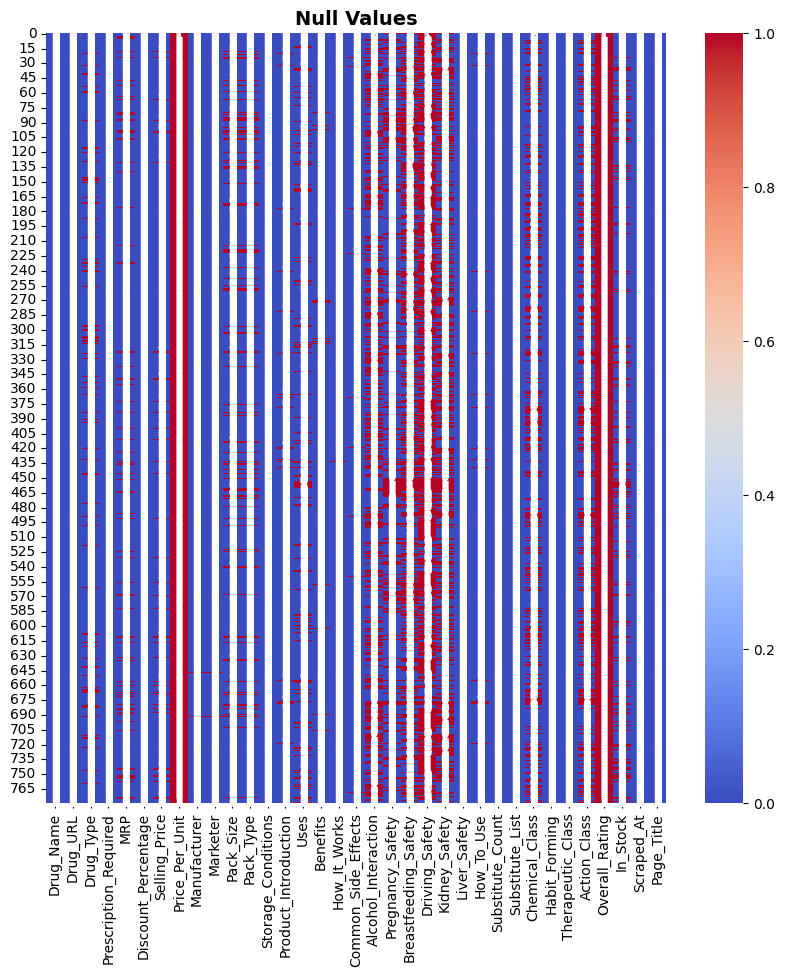

In [66]:
Null_Value = df.isnull().sum().sort_values(ascending=False)
Null_Value = pd.DataFrame({"Column": Null_Value.index,"Null Values": Null_Value.values})
display(Null_Value)

plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), annot=True, cmap='coolwarm')
plt.title("Null Values", fontsize=14, weight='bold')
plt.show()

### **Find the top 5 drugs with the highest MRP (after cleaning price values).**

In [30]:
df['MRP_clean'] = (df['MRP'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).str.replace('?', '', regex=False).str.strip())

df['MRP_clean'] = pd.to_numeric(df['MRP_clean'], errors='coerce')

Top_5_Mrp = df[['Drug_Name', 'MRP_clean']].sort_values(by='MRP_clean', ascending=False).head(5)
Top_5_Mrp

,Drug_Name,MRP_clean
187,Gazyva 1000mg Solution for Infusion,399305.0
578,Tecentriq 1200mg Injection,396725.0
356,Lorbriqua 100mg Tablet,292500.0
579,Tecentriq Injection,277708.0
472,Phesgo 600mg/600mg Solution for Injection,262500.0


### **Which drug types (Tablet, Syrup, Injection, etc.) are most common?**

,Column,Drug Type Frequency
0,Tablet,433
1,Injection,118
2,Capsule,83
3,Syrup,25
4,Cream,23
5,Gel,6
6,Ointment,6
7,Inhaler,3
8,Drops,3


<Figure size 800x500 with 0 Axes>

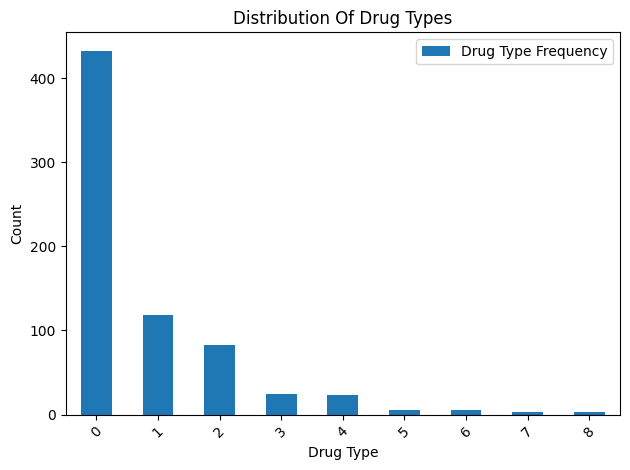

In [31]:
Drug_Type_Counts = df['Drug_Type'].value_counts()

Drug_Type_Counts = pd.DataFrame({"Column": Drug_Type_Counts.index,"Drug Type Frequency": Drug_Type_Counts.values})
display(Drug_Type_Counts)

plt.figure(figsize=(8,5))
Drug_Type_Counts.plot(kind='bar')
plt.title("Distribution Of Drug Types")
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **What percentage of medicines require a prescription vs. do not require a prescription?**

,Drug Type,Frequency
0,Yes,100.0


Prescription Requirement Counts:


,Count
Prescription_Required,
Yes,780



Percentage Distribution:


,Percentage
Prescription_Required,
Yes,100.0


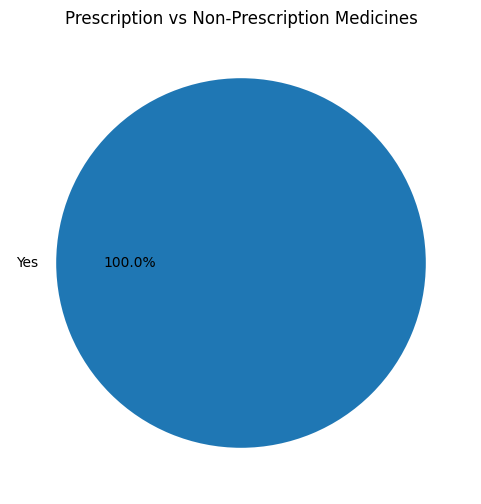

In [32]:
Percentage_Counts = df['Prescription_Required'].value_counts()

Percent = (Percentage_Counts / len(df)) * 100

Drug_Type_Counts = pd.DataFrame({
    "Drug Type": Percentage_Counts.index,
    "Frequency": Percent.values
})
display(Drug_Type_Counts)

print("Prescription Requirement Counts:")
display(Percentage_Counts.to_frame(name="Count"))

print("\nPercentage Distribution:")
display(Percent.round(2).to_frame(name="Percentage"))



plt.figure(figsize=(6,6))
Percentage_Counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Prescription vs Non-Prescription Medicines")
plt.ylabel("")
plt.show()

## **Identify columns with the highest missing values and list the top 5.**

In [33]:
Missing_Counts = df.isnull().sum()

Missing_Sorted = Missing_Counts.sort_values(ascending=False)

Top_5_Missing = Missing_Sorted.head(5)

Missing_Summary = pd.DataFrame({
    "Column": Top_5_Missing.index,
    "Missing Values": Top_5_Missing.values
})

display(Missing_Summary)

,Column,Missing Values
0,Overall_Rating,780
1,Price_Per_Unit,780
2,Driving_Safety,581
3,Breastfeeding_Safety,407
4,Alcohol_Interaction,360


## **Find the top 10 manufacturers with the highest number of medicines listed.**

In [34]:
Manufacturer_Counts = df['Manufacturer'].value_counts().head(10)

Manufacturer_Counts_DF = Manufacturer_Counts.to_frame(name="Count")

display(Manufacturer_Counts_DF)

,Count
Manufacturer,
Cipla Ltd,118
Dr Reddys Laboratories Ltd,59
Sun Pharmaceutical Industries Ltd,52
Mankind Pharma Ltd,31
Abbott,29
Pfizer Ltd,27
Alkem Laboratories Ltd,25
Intas Pharmaceuticals Ltd,23
USV Ltd,19


## **What are the most common action classes?**

In [61]:
Action_Class_Counts = df['Action_Class'].value_counts()

Action_Class_Counts_DF = Action_Class_Counts.to_frame(name="Count")

display(Action_Class_Counts_DF)

,Count
Action_Class,
Cholinesterase Inhibitors Interaction with drugs Taking Exelon with any of the following medicines can modify the effect of either of them and cause s,8
Erythropoiesis-Stimulating Agents (ESAs) Interaction with drugs Taking Actorise with any of the following medicines can modify the effect of either of,5
Atypical Antipsychotics Interaction with drugs Taking Qutipin with any of the following medicines can modify the effect of either of them and cause so,5
Erythropoiesis-Stimulating Agents (ESAs) Patient concerns Blood Hb is found 5.9 so wat is it Dr. Ila Jain Khandelwal Pathology Dear PATIENT from 1mg.,5
Amide-Type Local Anesthetics Interaction with drugs Taking Xylocaine with any of the following medicines can modify the effect of either of them and c,5
...,...
Bone Resorption Inhibitors- Monoclonal Antibodies Interaction with drugs Taking Xgeva with any of the following medicines can modify the effect of eit,1
Antimetabolites Interaction with drugs Taking Xeloda with any of the following medicines can modify the effect of either of them and cause some undesi,1
Antiseptics & Disinfectants Patient concerns 3 DAYS BACK I MET WITH AN ACCIDENT AND GOT SOME WOUNDS ON MY KNEE AND ANKLE. IN X RAY REPORT EVERYTHING I,1


## **Which drugs have the highest discounts?**

In [ ]:
df['Discount_clean'] = (df['Discount_Percentage'].astype(str).str.replace('%', '', regex=False).str.strip())

df['Discount_clean'] = pd.to_numeric(df['Discount_clean'], errors='coerce')

Top_10_Discount = df[['Drug_Name', 'Drug_Type', 'Manufacturer', 'Discount_clean']] \
                    .sort_values(by='Discount_clean', ascending=False) \
                    .head(10)

Top_10_Discount

## **Find the average MRP and average Selling Price of medicines (after cleaning).**

In [41]:
df['MRP_clean'] = (
    df['MRP']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace('?', '', regex=False)
    .str.strip()
)
df['MRP_clean'] = pd.to_numeric(df['MRP_clean'], errors='coerce')

df['SP_clean'] = (
    df['Selling_Price']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace('?', '', regex=False)
    .str.strip()
)
df['SP_clean'] = pd.to_numeric(df['SP_clean'], errors='coerce')

Avg_Mrp = df['MRP_clean'].mean()
Avg_Sp = df['SP_clean'].mean()
Avg_Discount = Avg_Mrp - Avg_Sp

Avg = pd.DataFrame({
    "Metric": ["Average MRP", "Average Selling Price", "Average Discount Value"],
    "Value": [round(Avg_Mrp, 2), round(Avg_Sp, 2), round(Avg_Discount, 2)]
})

display(Avg)

,Metric,Value
0,Average MRP,9606.97
1,Average Selling Price,7777.90
2,Average Discount Value,1829.07


## **Which drugs are currently out of stock?**

In [39]:
Out_Of_Stock = df[df['In_Stock'].astype(str).str.strip().str.lower() == "no"]

Out_Of_Stock_Subset = Out_Of_Stock[['Drug_Name', 'Drug_Type', 'Manufacturer', 'MRP', 'Selling_Price', 'In_Stock']].head(20)

Out_Of_Stock_Subset

,Drug_Name,Drug_Type,Manufacturer,MRP,Selling_Price,In_Stock
1,Actorise 100 Injection,Injection,Cipla Ltd,"? 7,549","? 5,484.38",No
2,Actorise 200 Injection,Injection,Cipla Ltd,"? 14,069","? 11,990.00",No
3,Actorise 25 Injection,Injection,Cipla Ltd,NaN,"? 1,899.00",No
4,Actorise 40 Injection,Injection,Cipla Ltd,NaN,"? 3,127.00",No
5,Actorise 60 Injection,Injection,Cipla Ltd,NaN,"? 5,558.44",No
12,Arkamin Tablet,Tablet,Torrent Pharmaceuticals Ltd,? 90.35,? 0.90,No
16,Ascoril LS Syrup,Syrup,Glenmark Pharmaceuticals Ltd,? 144.84,? 107.93,No
17,Atarax 25mg Tablet,Tablet,Dr Reddys Laboratories Ltd,? 106.41,? 2.07,No
18,Ativan 1mg Tablet,Tablet,Pfizer Ltd,NaN,NaN,No
23,AVil 25 Tablet,Tablet,Sanofi India Ltd,? 12.42,? 0.45,No


## **What is the distribution of medicine prices?**

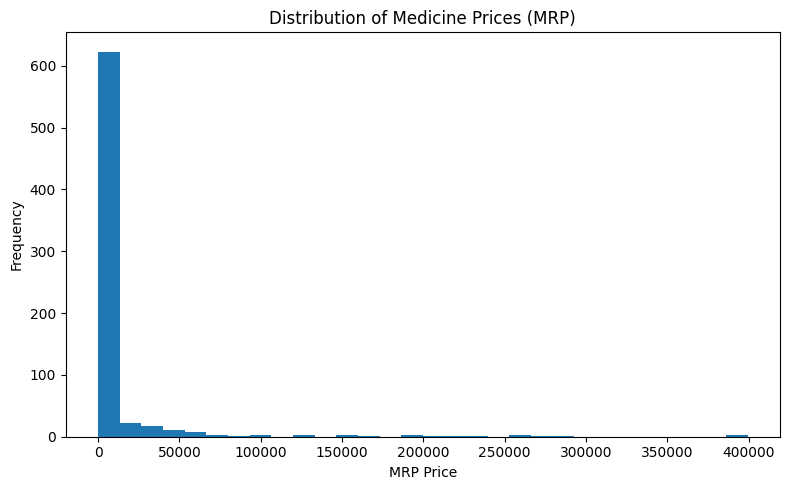

In [38]:
df['MRP_clean'] = (
    df['MRP']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace('?', '', regex=False)
    .str.strip()
)
df['MRP_clean'] = pd.to_numeric(df['MRP_clean'], errors='coerce')

plt.figure(figsize=(8,5))
plt.hist(df['MRP_clean'].dropna(), bins=30)
plt.title("Distribution of Medicine Prices (MRP)")
plt.xlabel("MRP Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## **Top 10 Manufacturers**

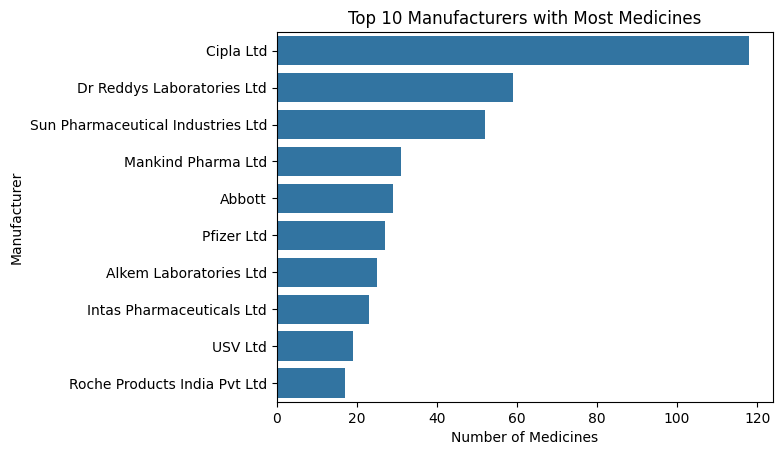

In [37]:
Top_Manufacturers = df ["Manufacturer"].value_counts().head(10)

sns.barplot(x=Top_Manufacturers.values, y=Top_Manufacturers.index)

plt.title("Top 10 Manufacturers with Most Medicines")
plt.xlabel("Number of Medicines")
plt.ylabel("Manufacturer")
plt.show()

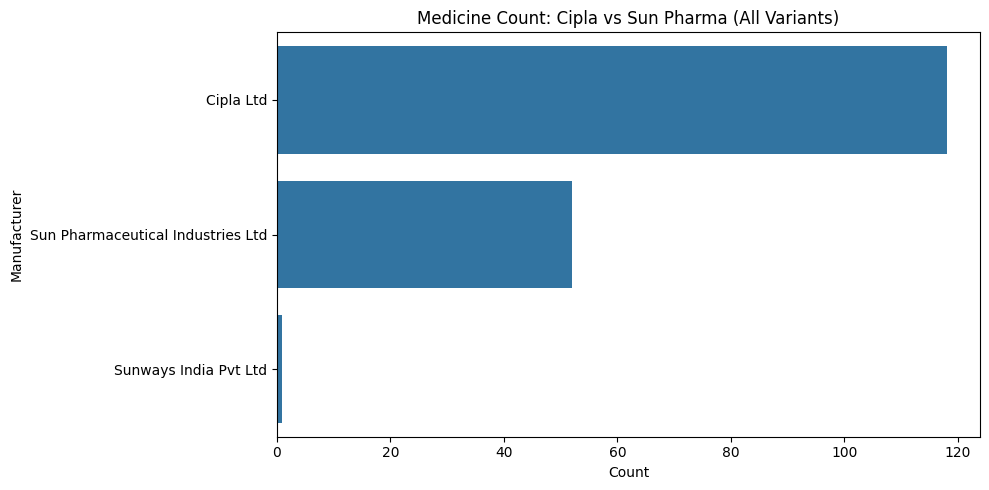

In [36]:
Subset = df[df["Manufacturer"].str.contains("Cipla|Sun", case=False, na=False)]

Plot_Data = Subset["Manufacturer"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=Plot_Data.index, x=Plot_Data.values)

plt.title("Medicine Count: Cipla vs Sun Pharma (All Variants)")
plt.xlabel("Count")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()